In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
house=pd.read_csv("house.csv")

In [2]:
house.floors=house.floors.astype('int64')
house.bathrooms=house.bathrooms.astype('int64')

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
house['sqft_above']=house['sqft_above'].fillna(house['sqft_above'].mean())

In [5]:
house=house.drop(columns='zipcode')

In [6]:
house.date = pd.to_datetime(house.date, format='%Y%m%dT%H%M%S')



In [7]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
def categorizing(basement):
    if basement==0:
        return 'no'
    else:
        return 'yes'
house['basement']=house['sqft_basement'].apply(categorizing)

In [9]:
print(house['basement'].value_counts())


no     13126
yes     8487
Name: basement, dtype: int64


## outliers

In [10]:
from scipy import stats
house_numeric = house.select_dtypes(include=['int64', 'float64'])
z_scores = stats.zscore(house_numeric)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
house_clean = house.drop(house.index[outliers.any(axis=1)])


# VISUALIZATION

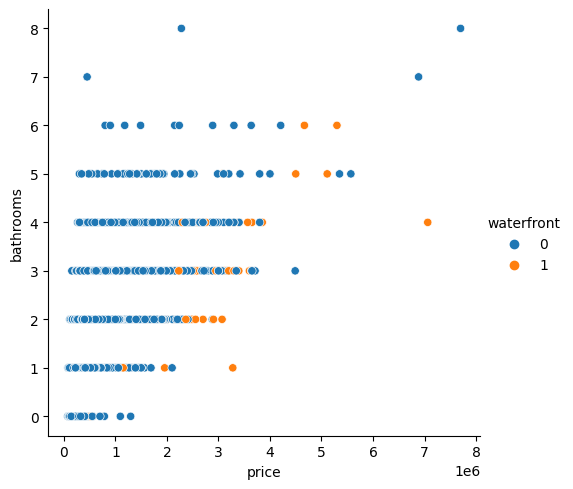

In [11]:
sns.relplot(x='price', y= 'bathrooms',hue='waterfront',data=house)

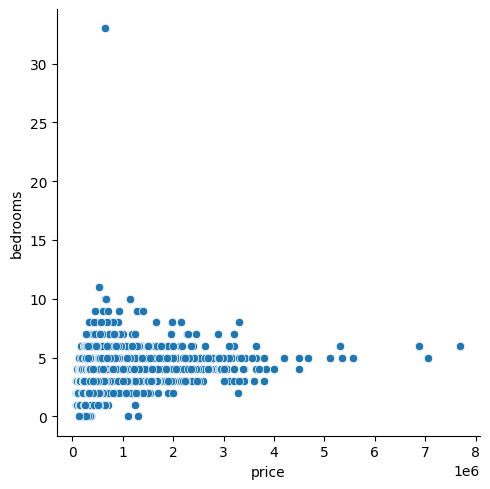

In [12]:
sns.relplot(x='price', y= 'bedrooms',data=house)

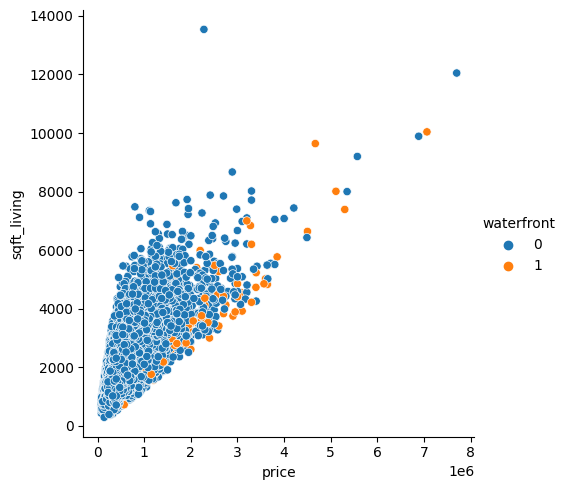

In [13]:
sns.relplot(x='price', y= 'sqft_living',hue='waterfront',data=house)

# Feature_engineering

In [14]:
house.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [15]:
def get_price_category(price):
    q=np.quantile(house['price'],[0.25,0.50,0.75,0.90])
    if price >= q[3]:
        return 'elite'
    elif price >= q[2]:
        return 'expensive'
    elif price >= q[1]:
        return 'above average'
    elif price >= q[0]:
        return 'average'
    else:
        return 'budget'
    
house['price_category']=house['price'].apply(get_price_category)


In [16]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basement', 'price_category'],
      dtype='object')

In [17]:
house.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
basement          0
price_category    0
dtype: int64

In [18]:
import datetime as dt

In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  int64         
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  int64         
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  sqft_above      21613 non-null  float64       
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

In [20]:
house['house_age']=(house.date.dt.year) - (house.yr_built)

In [21]:
house['total_sqft']=(house['sqft_living']+house['sqft_lot'])

In [22]:
house['bath_per_bed']=house.bathrooms/house.bedrooms

In [23]:
house= house.replace([np.inf, -np.inf], np.nan) 
house.dropna(inplace=True)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X= house.drop(['price','id','date','sqft_basement','yr_renovated','lat','long','sqft_lot15','condition','lat','yr_built','sqft_lot'],axis=1)
X=X.dropna()
y= house['price'][X.index]
X['price_category']=X['price_category'].replace({'expensive':4,'elite':5,'above average':3,'average':2,'budget':1})
X['basement']=X['basement'].replace({'yes':1,'no':0})


In [25]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_living15,basement,price_category,house_age,total_sqft,bath_per_bed
0,3,1,1180,1,0,0,7,1180.0,1340,0,1,59,6830,0.333333
1,3,2,2570,2,0,0,7,2170.0,1690,1,3,63,9812,0.666667
2,2,1,770,1,0,0,6,770.0,2720,0,1,82,10770,0.500000
3,4,3,1960,1,0,0,7,1050.0,1360,1,3,49,6960,0.750000
4,3,2,1680,1,0,0,8,1680.0,1800,0,3,28,9760,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2,1530,3,0,0,8,1530.0,1530,0,2,5,2661,0.666667
21609,4,2,2310,2,0,0,8,2310.0,1830,0,2,1,8123,0.500000
21610,2,0,1020,2,0,0,7,1020.0,1020,0,2,5,2370,0.000000
21611,3,2,1600,2,0,0,8,1600.0,1410,0,2,11,3988,0.666667


In [26]:
X_numeric = X.select_dtypes(include=['int64', 'float64'])
z_scores = stats.zscore(X_numeric)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
X = X.drop(X.index[outliers.any(axis=1)])
y=house['price'][X.index]

In [41]:
X.corrwith(house.price).sort_values(ascending=False)

price_category    0.901565
grade             0.630923
sqft_living       0.626432
sqft_living15     0.548535
sqft_above        0.532457
bathrooms         0.409137
bedrooms          0.298967
floors            0.236391
view              0.203861
bath_per_bed      0.193937
basement          0.159734
total_sqft        0.117962
house_age        -0.030284
waterfront             NaN
dtype: float64

In [28]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=2)


clf=LinearRegression()



In [29]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [30]:
clf.score(X_test,y_test)

0.8461212993071185

In [31]:
y_pred = clf.predict(X_test)


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2:",r2_score(y_test,y_pred)) 

MAE: 61220.764309270904
MSE: 9686354636.15096
RMSE: 98419.27979898533
R2: 0.8461212993071185


In [34]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basement', 'price_category',
       'house_age', 'total_sqft', 'bath_per_bed'],
      dtype='object')

In [35]:
X.columns


Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_living15', 'basement', 'price_category',
       'house_age', 'total_sqft', 'bath_per_bed'],
      dtype='object')

In [36]:
house_bi = house.loc[X.index, :]


In [37]:
house_bi.to_csv("house_bi.csv")

In [39]:
house_bi.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement,price_category,house_age,total_sqft,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,0,47.5112,-122.257,1340,5650,no,budget,59,6830,0.333333
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,1991,47.7210,-122.319,1690,7639,yes,above average,63,9812,0.666667
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,0,47.7379,-122.233,2720,8062,no,budget,82,10770,0.500000
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,0,47.5208,-122.393,1360,5000,yes,above average,49,6960,0.750000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,0,47.6168,-122.045,1800,7503,no,above average,28,9760,0.666667
